## Cat Dog Dataset

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

You can obtain the dataset from https://www.kaggle.com/c/dogs-vs-cats/data

This case study is adopted from https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

### 1. Import Library

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.models import Model
from keras.layers import Dense
from keras import optimizers

mypath='/Users/gceran/Google Drive/Courses/MagniMind/Mentorship Program/DL-MentorProgram/DL_Mentor_Week2/Class 2'
print(os.listdir(mypath))

Using TensorFlow backend.


['GenderIDTransfLearn.ipynb', '.DS_Store', 'cats_dogs_small', 'Icon\r', 'Keras CNN Dog or Cat Classifier-Vgg16-Transfer-Learning.ipynb', 'Week2-Class2-Inst', 'celeb_small', 'img', 'Week2-Class2-St.zip', '.ipynb_checkpoints', 'Week2-Class2-St']


### 2. Define Constants

In [2]:
FAST_RUN = True #False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### 3. Prepare Training Data

In [3]:
filenames = os.listdir(os.path.join(mypath, 'cats_dogs_small'))
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [4]:
df.shape

(2476, 2)

In [5]:
df.head()

,filename,category
0,dog.3144.jpg,1
1,dog.775.jpg,1
2,cat.12020.jpg,0
3,cat.8235.jpg,0
4,dog.7444.jpg,1


In [7]:
df['category'].value_counts()

1    1239
0    1237
Name: category, dtype: int64

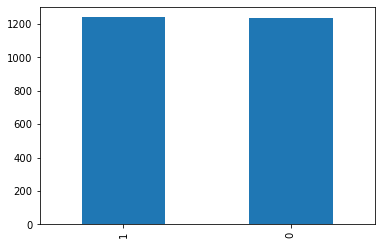

In [6]:
df['category'].value_counts().plot.bar()

From our data we have 1239 cats and 1237 dogs

#### See sample image

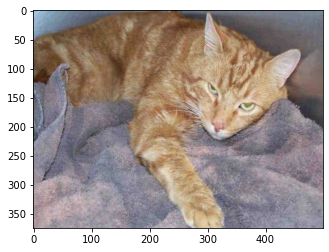

In [8]:
sample = random.choice(filenames)
pathimage=os.path.join(mypath, 'cats_dogs_small/')
image = load_img(pathimage+sample)
plt.imshow(image)

### 4. Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single dimension array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layer reduces the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)       

In [9]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense,Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

visible = Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
conv1 = Conv2D(32, (3, 3), activation='relu')(visible)
batch1=BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(batch1)
drop1=Dropout(0.25)(pool1)


conv2=Conv2D(64, (3, 3), activation='relu')(pool1)
batch2=BatchNormalization()(conv2)
pool2=MaxPooling2D(pool_size=(2, 2))(batch2)
drop2=Dropout(0.25)(pool2)

conv3=Conv2D(128, (3, 3), activation='relu')(drop2)
batch3=BatchNormalization()(conv3)
pool3=MaxPooling2D(pool_size=(2, 2))(batch3)
drop3=Dropout(0.25)(pool3)

flat=Flatten()(drop3)
dense1=Dense(512, activation='relu')(flat)
batch4=BatchNormalization()(dense1)
drop4=Dropout(0.5)(batch4)
output=Dense(2, activation='softmax')(drop4) # 2 because we have cat and dog classes
model = Model(inputs=visible, outputs=output)




In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0   

In [ ]:
# plot graph
#plot_model(model)#, to_file='multilayer_perceptron_graph.png')

### 5. Callbacks

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

Keras supports the early stopping of training via a callback called EarlyStopping.

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

The `EarlyStopping` callback is configured when instantiated via arguments.

The `monitor` allows you to specify the performance measure to monitor in order to end training.

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [13]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [15]:
callbacks = [earlystop, learning_rate_reduction]

### 6. Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [16]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [17]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

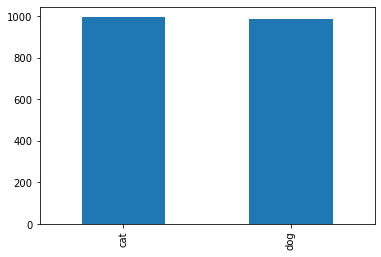

In [18]:
train_df['category'].value_counts().plot.bar()

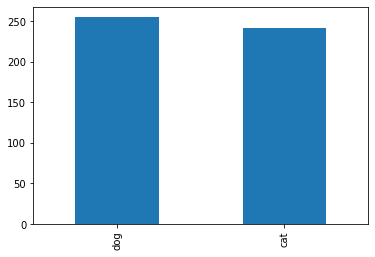

In [19]:
validate_df['category'].value_counts().plot.bar()

In [20]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=20

### 7. Traning Generator

In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1979 validated image filenames belonging to 2 classes.


/Users/gceran/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


### Validation Generator

In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 496 validated image filenames belonging to 2 classes.


### 8. See how our generator work

In [37]:
example_df = train_df.sample(n=1).reset_index(drop=True)
##When we reset the index, the old index is added 
##as a column, and a new sequential index is used
##We can use the drop parameter to avoid the old
##index being added as a column
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [38]:
example_df

,filename,category
0,cat.10238.jpg,cat


In [39]:
train_df.sample(n=1)

,filename,category
422,dog.1085.jpg,dog


In [40]:
x,y=next(example_generator)
print(x.shape)
print(y.shape)

(1, 224, 224, 3)
(1, 1)


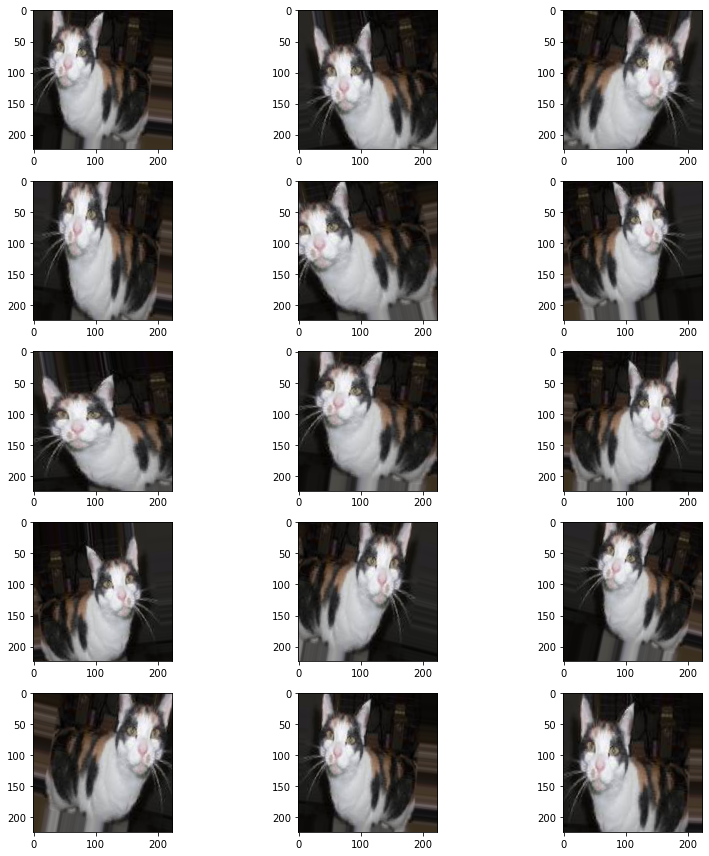

In [44]:
##A DirectoryIterator yielding tuples of (x, y) where
##x is a numpy array containing a batch of images with
##shape (batch_size, *target_size, channels) and y is a
##numpy array of corresponding labels.

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Seem to be nice 

### 9. Fit Model

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [46]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/3
99/99 [==============================] - 1003s 10s/step - loss: 1.2412 - accuracy: 0.5579 - val_loss: 1.2889 - val_accuracy: 0.4875
Epoch 2/3
99/99 [==============================] - 1454s 15s/step - loss: 0.8885 - accuracy: 0.5932 - val_loss: 1.2454 - val_accuracy: 0.4811
Epoch 3/3
99/99 [==============================] - 1237s 12s/step - loss: 0.7964 - accuracy: 0.6018 - val_loss: 0.8164 - val_accuracy: 0.4853

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


### 10. Save Model

In [41]:
model.save_weights("model_API_dog_cat.h5")

### 11. Virtualize Training

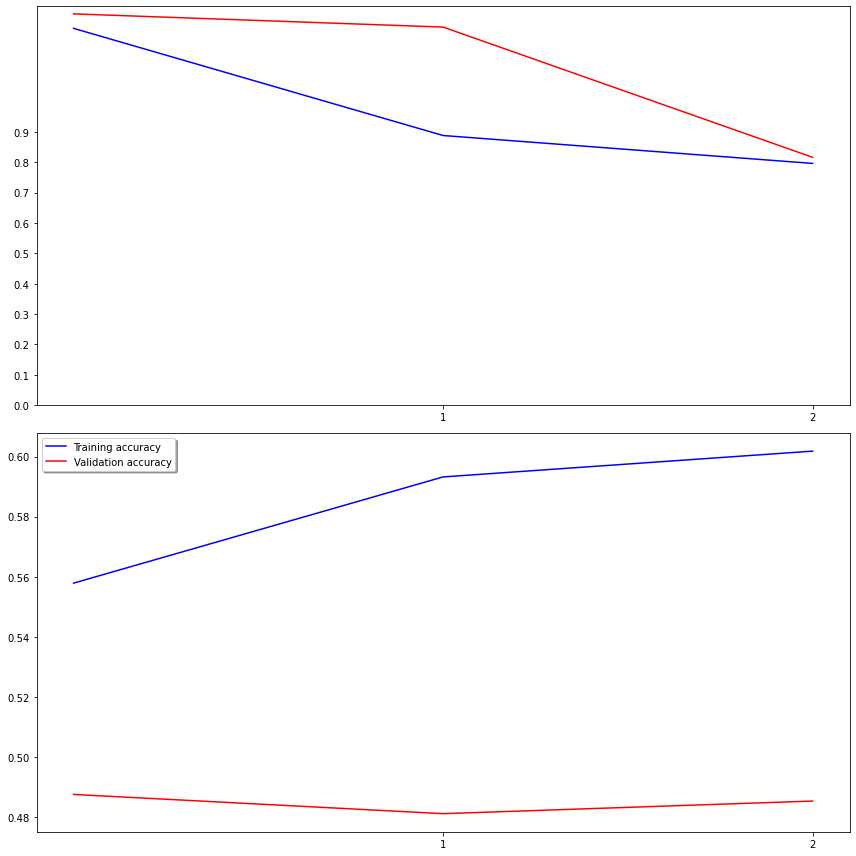

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### 12. Prepare Testing Data

In [43]:
testpath=os.path.join(mypath, 'test1')
test_filenames = os.listdir(testpath)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

### 13. Create Testing Generator

In [44]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    testpath, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


### 14. Predict

In [45]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [46]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [47]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [48]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

#### Virtualize Result

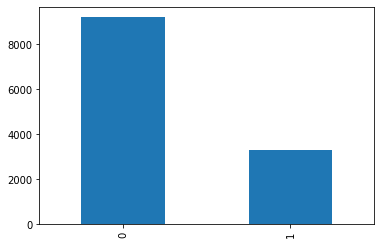

In [49]:
test_df['category'].value_counts().plot.bar()

### 15. See predicted result with images

In [12]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(testpath+'/'+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

NameError: name 'test_df' is not defined